# Machine learning by Andrew Ng
# Week02


## Multiple features

* we can use multiple features to estimate our output
* hypothesis $h_\theta(x) = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + ... + \theta_n x_n$ or $\theta^Tx$
* with  gradient descent we iterate through all the values x


## feature modeling

* make sure that features got the same scale of values
* as gradient descent will be more close to circle
* scale feature so each feature $-1 \leq x_i \leq 1$
	* be within $\pm e^2$
	* feature scalning and mean normalisation
	* $\frac{x-\mu}{value_range}$
* learning rate
	* debugging gradient descent - plot $J(\theta)$ over iterations
	* $J(\theta)$ should decrease after each elevation
	* otherards use threshold level
	 * it is diffficult to determine value
	* if $J(\theta)$ increase or if it jumps up and down use smaller $\alpha$
	* if $\alpha$ is too small convergence will be slow
	* try choose $\alpha$ by using values x3 (0.001, 0.003, 0.01 ect)
* creating new features by combining other ones
* polynomial regression
 * or cubic function ect
 * if you do this make sure to apply feature scaling

## Normal equation

* solve data analytically instead of gradient descent
* calculate $\frac{dJ(\theta)}{dx} = 0$ for each parameter $\theta$
* to minmalise we use $(X^TX)^{-1}X^Ty$
* should need less iterations than gradient decent
* gradient descent works well even if n is large, while normal eq slow if n is large
* need to compute $A^{-1}$ $O(n^3)$
* normal equation will not work for more complex algorithms
* normal equation non-invertibility (degenerated matrix)
	* use sudo invertion instead (pinv)
	* redudant features
	* too many features
		* remove some features
		* use regularisation



# Exercise 2

In this exercise, you will implement linear regression and get to see it work on data.

## Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [2]:
import pandas as pd
import scipy as sp
import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#load in the data, set header to None so that first line isn't assigned as header
data = pd.read_csv('ex1/ex1data1.txt', header = None)

In [9]:
data.columns = ['X','y']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
X    97 non-null float64
y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

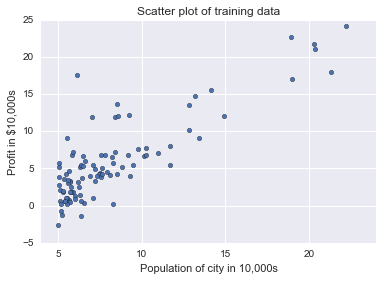

In [38]:
ax = data.plot(kind='scatter', x='X', y='y', xlim= (4,24), ylim=(-5,25))
ax.set_xlabel("Population of city in 10,000s")
ax.set_ylabel("Profit in $10,000s")
ax.set_title("Scatter plot of training data");


## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent. 

In [125]:
m = len(data)
iterations = 1500
alpha = 0.01
theta = np.zeros([2, 1]) # initialize fitting parameters

X = pd.DataFrame(np.ones([m, 1])) 
X=X.join(data.X)
y = data.y



The objective of linear regression is to minimize the cost function

$J(\theta)= \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i)-y^i)^2$ 

where where the hypothesis 
$h_\theta(x)$ is given by the linear model 

$h_\theta (x)= \theta^Tx = \theta_0 + \theta_1x_1$

In [137]:
'''
define cost function J()
X is a dataframe of input features, plus a column of ones to accommodate theta 0; 
y is a vector that we are trying to predict using these features, and theta is an array of the parameters
'''
def costFunction(X,y,theta):
 
 m = len(data)
    
 v = np.subtract(np.dot(X,theta)[0],y)
 SD = np.dot(v.transpose(),v)
 J = np.divide(SD,2*m)

 return J

In [138]:
costFunction(X,y,theta)

32.072733877455676

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm

 $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i)-y^i)x^i_j$ 
 
 simultaneously update $\theta_j$ for all j. With each step of gradient descent, your parameters  $\theta_j$ come closer to the
optimal values that will achieve the lowest cost  $J(\theta)$.

In [139]:
 v = np.subtract(np.dot(X,theta)[0],y)
 SD = np.dot(v.transpose(),v)
 J = np.divide(SD,2*m)

In [145]:
 v = np.subtract(np.dot(X,theta)[0],y)

In [142]:
'''
define a function that will implement the gradient descent algorithm
Implement the gradient descent algorithm, where alpha is the learning rate and num_iters is the number of iterations to run
'''
def gradientDescent(X,y,theta,alpha,num_iters):
  
 Jhistory = [] #initiate an empty list to store values of cost function after each cycle
 m = len(data)
    
 for num_iter in range(num_iters): #these update only once for each iteration
  v = np.subtract(np.dot(X,theta)[0],y)
  delta = np.divide(np.dot(v.transpose(),X),m)
    
  theta = np.subtract(theta,np.multiply(alpha,delta.transpose()))

        
 return Jhistory, theta


In [144]:
#try running the function 
Jhistory, theta_update= gradientDescent(X,y,theta,alpha,1500)  
Jhistory[:10]

ValueError: operands could not be broadcast together with shapes (2,) (97,) 

In [50]:
# These are the final values for theta
theta_update

array([[-3.63029144],
       [ 1.16636235]])

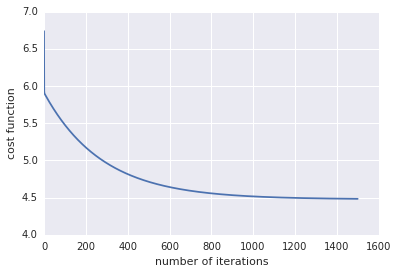

In [51]:
# Check the output of Jhistory is decreasing towards a minimum
plt.plot(Jhistory)
plt.xlabel("number of iterations")
plt.ylabel("cost function")

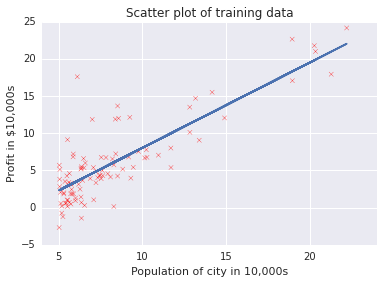

In [209]:
#Add a line which shows the outcome of the gradient descent after 1000 iterations
plt.scatter(X.iloc[:,1],y, c = 'r', marker = 'x')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plot of training data")
plt.xlim(4,24)
plt.ylim(-5,25)
plt.plot(X.iloc[:,1],X.dot(theta_update))

In [21]:
# Next I want to make a contour plot that plots theta0 against theta 1 and the outcome of J
# First initiate values for theta0 and theta 1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [280]:
#they both have length 100
len(theta1_vals)

100

In [22]:
# initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])
J_vals.shape

(100L, 100L)

In [33]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        
        J_vals[i,j] = costJ(X, y, t)


<matplotlib.contour.QuadContourSet instance at 0x000000000CAE3348>

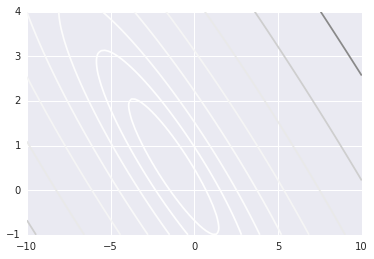

In [34]:
plt.contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))

<matplotlib.contour.QuadContourSet instance at 0x000000000D124948>

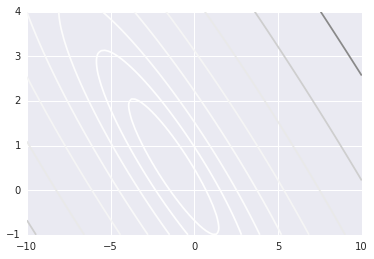

In [36]:
plt.contour(theta0mesh,theta1mesh,J_vals, np.logspace(-2, 3, 20))

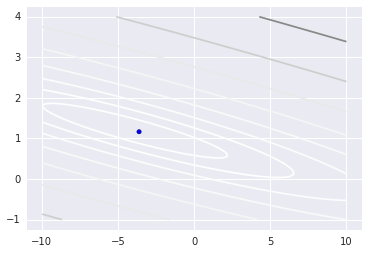

In [87]:
sn.set_palette("Blues")
plt.scatter(theta_update[0], theta_update[1], )
plt.contour(theta0_vals, theta1_vals, J_vals.T, logspace(-2, 3, 20))
sn.set_style("darkgrid")


In [40]:
#numpy.meshgrid takes two (or more) 1d x and y coordinate arrays, and returns a pair of 2d x and y grid arrays. 
theta0mesh, theta1mesh = np.meshgrid(theta0_vals,theta1_vals)


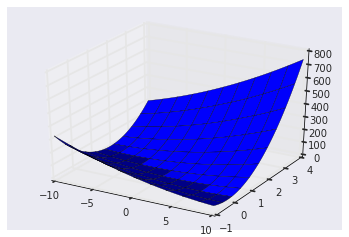

In [88]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0mesh, theta1mesh, J_vals.T)